In [1]:
#!pip3 install twint

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import nest_asyncio # Patch asyncio to allow nested event loops
nest_asyncio.apply()

In [ ]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [2]:
import snscrape.modules.twitter as sntwitter
import snscrape.modules.twitter

# Scraping data
TWINT:    
1. https://analyticsindiamag.com/complete-tutorial-on-twint-twitter-scraping-without-twitters-api/


Snsscrape:    
1. https://github.com/MartinBeckUT/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb
2. https://medium.com/swlh/how-to-scrape-tweets-by-location-in-python-using-snscrape-8c870fa6ec25
3. https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

Collect NFT ethical-related discussion from twitter KOL 'NFTethics'  

We want to analyze not only the tweets from 'NFTethics' which has 85.5k followers but also the whole internet opinions. So we also need to scrape corresponding replies at each tweet collected. Thus we broke down the goal into tasks below:
1. collect tweets from twitter user 'NFTethics'
2. find corresponding replies of each collected tweet
3. store both tweets and replies into one text file
4. preprocess the text file
5. analysis by different methods

## T1: collect tweets from twitter 
重要信息：数据采集时间段，总计多少条

### Collect by snscrape 

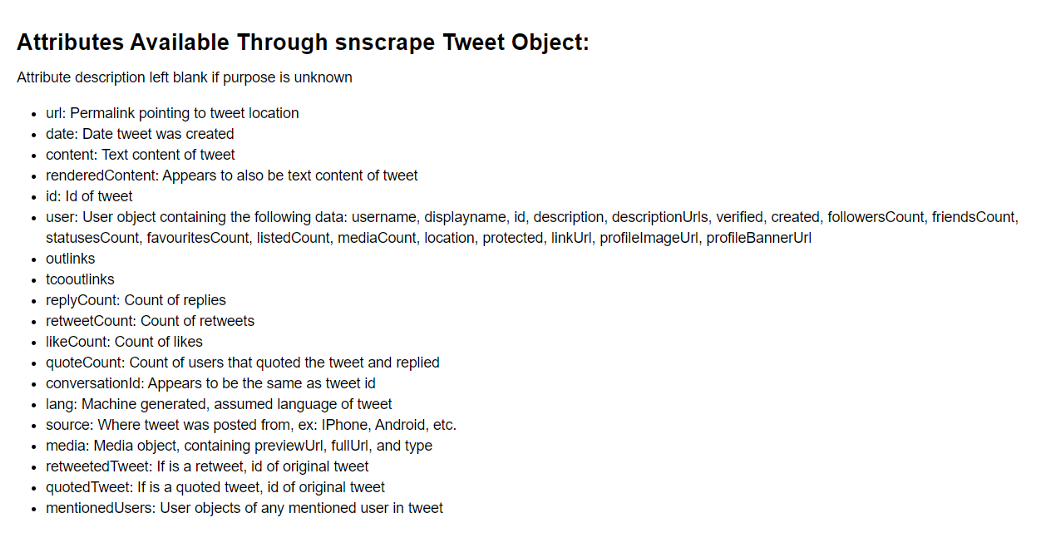

In [8]:
def sns_query(keyword,since,end):
    # Creating list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    try:
        # only scrape English tweets which has at least 5 likes
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'NFT {keyword} since:{since} until:{end} min_faves:5 exclude:retweets lang:en').get_items()):
            tweets_list.append([tweet.date, tweet.user, tweet.content, tweet.url]) #tweet.id
    except Exception as e:
        print(e)
    
    result=pd.DataFrame(tweets_list, columns=['Date', 'User','Tweets','Url'])
    result.to_csv(f"./data/NFT {keyword}.csv")
    
    print(f"Task:query {keyword} since {since} to {end} finished!")
    
    return result

### Query by group

1. ethics, ethical, morality, moral   
2. fairness, equity, equality  
3. trust, transparency, transparent   
4. bias, discrimination, racism  
5. diversity, diverse  

In [11]:
ethic_group = ['ethics','ethical', 'morality', 'moral']
fairness_group = ['fairness', 'equity', 'equality']
trust_group = ['trust', 'transparency', 'transparent']
bias_group = ['bias', 'discrimination', 'racism']
diversity_group = ['diversity','diverse']

In [9]:
for i in ethic_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query ethics since 2021-06-01 to 2022-06-01 finished!
Task:query ethical since 2021-06-01 to 2022-06-01 finished!
Task:query morality since 2021-06-01 to 2022-06-01 finished!
Task:query moral since 2021-06-01 to 2022-06-01 finished!


In [10]:
for i in fairness_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query fairness since 2021-06-01 to 2022-06-01 finished!
Task:query equity since 2021-06-01 to 2022-06-01 finished!
Task:query equality since 2021-06-01 to 2022-06-01 finished!


In [11]:
for i in trust_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query trust since 2021-06-01 to 2022-06-01 finished!
Task:query transparency since 2021-06-01 to 2022-06-01 finished!
Task:query transparent since 2021-06-01 to 2022-06-01 finished!


In [12]:
for i in bias_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query bias since 2021-06-01 to 2022-06-01 finished!
Task:query discrimination since 2021-06-01 to 2022-06-01 finished!
Task:query racism since 2021-06-01 to 2022-06-01 finished!


In [13]:
for i in diversity_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query diversity since 2021-06-01 to 2022-06-01 finished!
Task:query diverse since 2021-06-01 to 2022-06-01 finished!


In [14]:
# store tweets of different keywords in respective dataframes
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        name = i.replace(' ','_')
        exec('df_{} = pd.read_csv(\'./data/{}.csv\')'.format(name,'NFT '+i))
    else:
        exec('df_{} = pd.read_csv(\'./data/{}.csv\')'.format(i,'NFT '+i))

### Combining all tweets

In [2]:
import os, glob

path = "./data/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, index_col=[0])
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
df_merged = pd.concat(all_df, ignore_index=True, sort=True)
# find the account name
df_merged['User'] = df_merged['User'].apply(lambda x: x.split('/')[-1])

In [3]:
# df_merged.to_csv('df_all_tweets.csv')

In [5]:
print('There are',len(df_merged),'tweets collected in total')

There are 33535 tweets collected in total


In [59]:
df_merged.head()

,Date,Tweets,Url,User,file
0,2022-05-31 20:49:25+00:00,"Zero-sum thinking, bag bias, elitism, and maxi...",https://twitter.com/LeonidasNFT/status/1531739...,LeonidasNFT,data\NFT bias.csv
1,2022-05-31 16:46:28+00:00,Looking at NFT projects these days has become ...,https://twitter.com/eddyiskongz/status/1531678...,eddyiskongz,data\NFT bias.csv
2,2022-05-31 12:19:47+00:00,@freak__nft IMO @officialmocossi are super und...,https://twitter.com/mnddigexplr/status/1531611...,mnddigexplr,data\NFT bias.csv
3,2022-05-31 08:33:42+00:00,@TrizyTradez This is called Dunning-Kruger Eff...,https://twitter.com/NFT_Doctor33/status/153155...,NFT_Doctor33,data\NFT bias.csv
4,2022-05-30 09:27:58+00:00,you might think I'm bias but...\n\n@DeGodsNFT ...,https://twitter.com/AussieNftGuy/status/153120...,AussieNftGuy,data\NFT bias.csv


In [7]:
print('There are',len(df_merged['User'].unique()),'unique users posted tweets according to our dataset')

There are 21573 unique users posted tweets according to our dataset


In [115]:
df_merged['User'].value_counts()[:50]

NFTethics          784
wearelivingNFT     146
PixelSaurusNFT      92
shreyamishra92      89
takeupspace_nft     77
worldfolksart       74
betty_nft           61
CMcbitchen          50
UnikGals_NFT        49
Trustworks_NfT      44
nftcv               43
osf_nft             42
diverse             42
Smart_Contract      40
Artistwithwords     36
blacksquare_art     35
NFTherder           34
chainlink           34
trust_recruit       32
CryptoHunity        32
Xer0x_NFT           32
NFT_Awareness       32
nftfreaks           28
cipilica83          28
quantmre            27
haningwaslost       27
ABigThingBadly      26
asamisan_nft        26
Diverse__Pixels     24
World_Skull_Art     23
kingstarleo1        23
atgoodm             23
OttoSuwenNFT        22
iSocialFanz         22
theycallmeshwaz     22
beaniemaxi          22
420Doges            21
PetrSavoy           21
MONOGRAMA_NFT       20
NotDolls_nft        20
goku_nft            20
AcceptyArt          20
Loopifyyy           20
thisiswenze

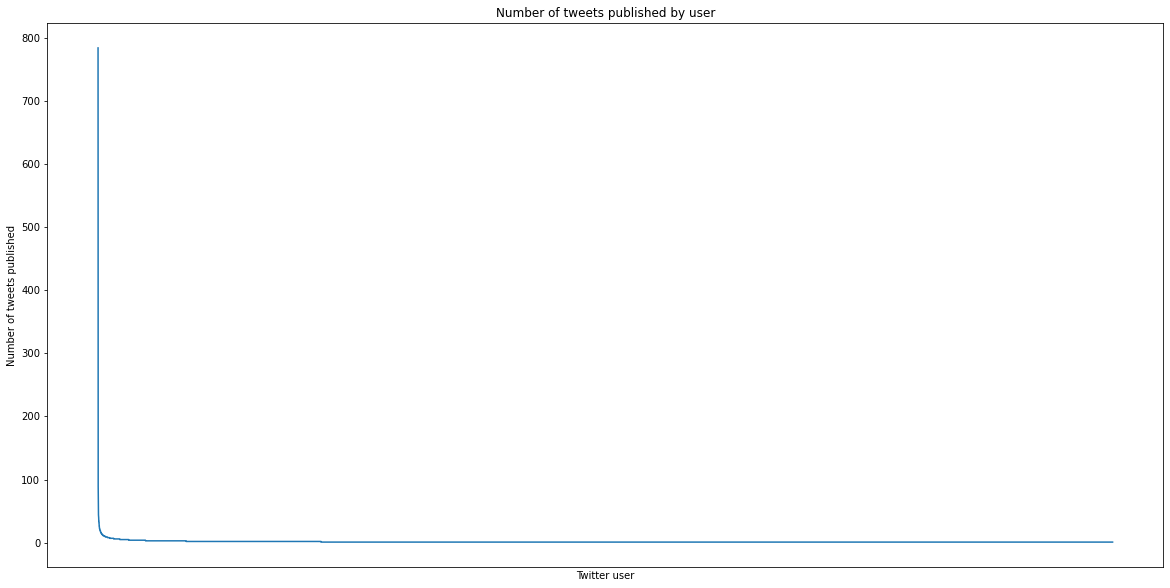

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_merged['User'].value_counts().values)
plt.title('Number of tweets published by user')
plt.ylabel('Number of tweets published')
plt.xlabel('Twitter user')
plt.xticks([], [])
plt.show()

<AxesSubplot:>

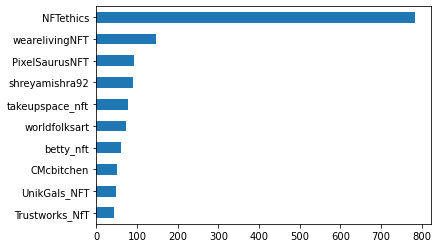

In [88]:
top_tweets_account = list(df_merged['User'].value_counts(ascending=True)[-10:].index)
df_merged['User'].value_counts(ascending=True)[-10:].plot(kind='barh')

For the top 10 most active twitter users, only NFTethics didn't belong to direct stakeholders. CMcbitchen is a co-founder of several token companies. The other users are all creators or artists.

# Data cleaning
references:
1. https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python
2. https://catriscode.com/2021/05/01/tweets-cleaning-with-python/
3. https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597

We’ll clean tweets based on these rules:
1. Remove all the hashtags as hashtags do not affect sentiments.
2. Remove mentions as they also do not weigh in sentiment analyzing.
3. Replace any emojis with the text they represent as emojis or emoticons plays an important role in representing a sentiment.
4. Replace contractions with their full forms.
5. Remove any URLs present in tweets as they are not significant in sentiment analysis.
6. Remove punctuations.
7. Fix misspelled words (very basic as this is a very time-consuming step).
8. Convert everything to lowercase.

In [33]:
import json
import re
import emoji
import datetime
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer # Wordnet is used for lemmatization (aka stemming), which is the process of bringing words down to their 'root' word. 
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import brown
from nltk.corpus import stopwords

In [16]:
# emoticons 表情符号
def load_dict_smileys():
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions 缩写
def load_dict_contractions():
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "dont":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "isnt":"is not",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "youre":"you are",
        'yall':"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "irl":"in real life"
        }

In [17]:
def cleaner(tweet):
    '''
    Define a function to clean twitter text for sentiment analysis.
    Input: text string
    Output: filter and delete html labels, unnecessary links, hashtags, username, punctuations; deal with emojis
    '''
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    #Remove @ mentions
    tweet = re.sub(r"@[A-Za-z0-9]+","",tweet)
    #Remove # hashtags
    tweet = re.sub(r"#[A-Za-z0-9_]+","", tweet)
    #Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    #Remove punctuation
    tweet = re.sub(r"[^\w\s]","",tweet)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    tweet = tweet.replace(":"," ")
    tweet = ' '.join(tweet.split())
    #Remove numbers
    tweet = re.sub(r"\d","",tweet)
    
    #Lower case
    #tweet = tweet.lower() #不小写是因为社交媒体中大小写变化常常反映情绪的变化
    
    #Normalize CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    
    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    
    #Clean stopwords
    manual_screen = ['also','nfts','going'] 
    stop_words = stopwords.words('english')+manual_screen
    words = tweet.split()
    reformed = [w for w in words if w.lower() not in stop_words]
    tweet = " ".join(reformed)
    
    #Lemmatize 词形还原 且仅保留英文
    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    reformed = [lemmatizer.lemmatize(w) for w in words if w.encode().isalpha()] #必须加个encode，否则中文也会被当成英文
    tweet = " ".join(reformed)
    
    return tweet

# store all tweets and replies to a txt file
import csv
def list_to_string(lst):
    return " ".join(lst)

In [21]:
'''
输入：dataframe，存储着按某个关键词爬虫到的推特
输出：执行完文本清理后的txt推特文档
'''
def save_tweets_to_txt(df,filename):
    # clean collected tweet
    df['Tweets'] = df['Tweets'].map(lambda x: cleaner(x))
    
    # export tweets to a txt file
    df['Tweets'].map(lambda x: cleaner(x))[df['Tweets'] != ''].to_csv('./tweets/'+filename, sep=' ', 
                      index=False,header=False,
                      quoting=csv.QUOTE_NONE,escapechar=' ')

'''
输入：推特txt文档
输出：输出tokenize过后的word list
'''
def read_txt_by_word(filename):
    with open('./tweets/'+filename,mode='r',encoding='utf-8') as f:
        text.append(f.read())
        
    # seperate by space
    words = ' '.join(text).replace('\n',' ').split()

    # remove short meaningless characters
    for word in words:
        if word!=' ' and len(word)<3:
            words.remove(word)

    return words

## preprocessed data

将每个【关键词】爬虫到的推文进行【预处理】并存储到txt文本中

In [19]:
# store tweets from each keyword to according txt file
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        i = i.replace(" ","_")
    name = f'df_{i}'
    save_tweets_to_txt(eval(name),f'tweets_{i}.txt')

随机从每个【关键词】中抽50个推特原文，创建5个dataframe变量存储对应【关键词组】下抽取到的推特原文

In [61]:
# randomly select specific number of tweets from each twwets file
def random_select_tweees(groupname,number):
    all_sampled_df = [] 
    for i in eval(groupname):
        df = pd.read_csv('./data/NFT '+i+'.csv', index_col=[0])
        df = df.sample(number)
        all_sampled_df.append(df)
        df.to_csv(f'./data/df_{i}_sampled.csv')
    return pd.concat(all_sampled_df, ignore_index=True)

In [62]:
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    #创建变量存储抽取到的推特原文
    exec(f'df_{i}_sampled = random_select_tweees(i,50)')
    print(i)
    print('========================================')
    print(eval(f"df_{i}_sampled.Tweets.values"))
    print('========================================')

ethic_group
["@NFTethics I'm willing to bet that center wallet is a coinbase common. SMH weak analysis"
 '3/ We can understand the logic behind it, and also we are fallible to the same “flaw”. When we report something, we might be 95% “right” but there could be collateral damage. You can’t check each &amp; every detail (certainly not with NFTs) and these details can also change over time'
 '@ninaadkothawade @NFTethics LMAOOOOOOO'
 '@SPACEracerX @NFT_L30 @SolarEtherPunk @NFTethics If cooltopia turns in to a metaverse mmorpg I’m dumping immediately. I thought I was buying a simple clicker ponzi game.'
 '@osf_nft @NFTethics Sacred Devils took them down https://t.co/8QMe773lMU'
 '@apesnotleaving1 @amal_h0pe @bapesclan @bapesraiders @NFTethics 250 wallets but 1 of them is a life pod that will be taking off to bapes world! Staking mechanism the best is yet to come'
 '@NFTethics @yugalabs Welcome to Web3, where Web2 giants become even more enormous.\nThe same VCs making headlines everywhere.\

["@TheGlitches_ diversity. the more NFT's grow, the more diverse group of collectors there are. glitches are the ppl"
 'Notice when everyone around your table looks and thinks like you.  Proud of the leaders that are intentional about diversity and believe that web3 is for everyone!  @ryancarson and @betty_nft are great examples of leaders that are putting their money where their mouth is.'
 '@NFT_NYC @meta_angels @aslanruby @HoneyBadgesNFT ✨The Diversity Award: @thehugxyz\nOK, I work for HUG, &amp;... I have honestly never been part of a more intentional community, not just saying the word diversity, but living it. HUG is leading by example, having difficult conversations + learning + growing together as a community.'
 'Diversity is inherent in humanity. I would like to express this more with my Nft collection.Follow here and check out the opensea solution to see if you find anything interesting.😉\n#NFT #nftart #nfts #NFTCommunity #NFTartists \n\nBy: https://t.co/TAHl45sTGh https://t.

### Tokenize by group

In [9]:
# 定义一个功能，输入（自定义的字典名称，关键词组名），用于将给定关键词组下所有关键词的推特文本合并后返回tokenize的word list
# 返回结果为一个key为自定义名称，value为tokenized word list的字典
def organize_by_group(name,group):
    # emerge all tweets from each keyword and tokenize to a word list
    text = []
    for i in group:
        if ' ' in i:
            i = i.replace(" ","_")
        with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
            text.append(f.read())
 
    words = ' '.join(text).replace('\n',' ').split()

    # remove short（length<3） meaningless characters
    for word in words:
        if word!=' ' and len(word)<=3:
            while word in words:
                words.remove(word)
        else:
            continue
            
    return {name:words}

In [12]:
words_group = {}
# update字典合并
words_group.update(organize_by_group('ethic_group',ethic_group))
words_group.update(organize_by_group('fairness_group',fairness_group))
words_group.update(organize_by_group('trust_group',trust_group))
words_group.update(organize_by_group('bias_group',bias_group))
words_group.update(organize_by_group('diversity_group',diversity_group))

In [ ]:
# all tweets collected and preprocessed
tweets = []
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        i = i.replace(" ","_")
    with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
        tweets.extend(f.read().lower().split('\n'))

In [7]:
# 返回某个关键词组下的推特列表
def collect_tweets_by_group(groupname):
    tweets = []
    for i in groupname:
        if ' ' in i:
            i = i.replace(" ","_")
        with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
            tweets.extend(f.read().lower().split('\n'))
    
    return tweets

In [199]:
# 动态命名：各关键词组所爬的推特
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    exec(f'tweets_{i} = collect_tweets_by_group({eval(i)})')

Sampled tweets

In [4]:
def tweets_txt_to_words(groupname):
    # tokenize tweets txt to a word list
    text = []
    with open(f'./tweets/tweets_{groupname}.txt',mode='r',encoding='utf-8') as f:
        text.append(f.read())

    words = ' '.join(text).replace('\n',' ').split()

    # remove short meaningless characters
    for word in words:
        if word!=' ' and len(word)<=3:
            while word in words:
                words.remove(word)
        else:
            continue
            
    return {groupname:words}

In [5]:
sampled_words_group = {}
# 字典合并
sampled_words_group.update(tweets_txt_to_words('ethic_group'))
sampled_words_group.update(tweets_txt_to_words('fairness_group'))
sampled_words_group.update(tweets_txt_to_words('trust_group'))
sampled_words_group.update(tweets_txt_to_words('bias_group'))
sampled_words_group.update(tweets_txt_to_words('diversity_group'))

### Combine all

Combine all

In [19]:
# emerge all tweets from each keyword and tokenize to a word list
text = []
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        i = i.replace(" ","_")
    with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
        text.append(f.read())

# seperate by space
words = ' '.join(text).replace('\n',' ').split()

# remove short meaningless characters
for word in words:
    if word!=' ' and len(word)<=3:
        while word in words:
            words.remove(word)
    else:
        continue

Combine all sampled

In [6]:
# emerge all tweets from each keyword and tokenize to a word list
text = []
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    with open(f'./tweets/tweets_{i}.txt',mode='r',encoding='utf-8') as f:
        text.append(f.read())

# seperate by space
words_sampled = ' '.join(text).replace('\n',' ').split()

# remove short meaningless characters
for word in words_sampled:
    if word!=' ' and len(word)<=3:
        while word in words_sampled:
            words_sampled.remove(word)
    else:
        continue

# Word frequncy

## All

In [34]:
lowered_words = [word.lower() for word in words] 
fdist = nltk.FreqDist(lowered_words) # create a frequency distribution containing the given samples
print(fdist)

<FreqDist with 28546 samples and 463508 outcomes>


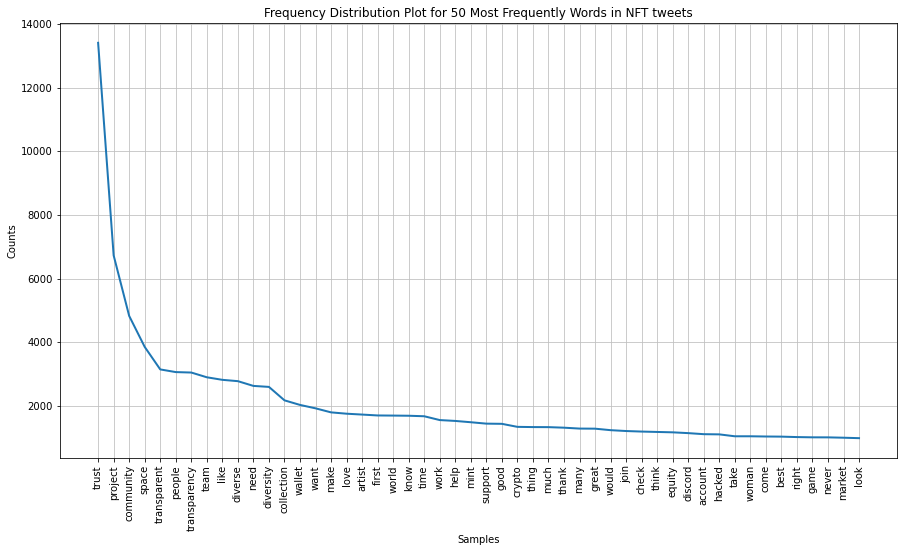

In [35]:
plt.figure(figsize=(15,8))
plt.title('Frequency Distribution Plot for 50 Most Frequently Words in NFT tweets')
fdist.plot(50)
plt.show()

## By Keyword Group

In [194]:
lowered_words_by_group = {}
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    lowered_words_by_group[i] = [word.lower() for word in words_group[i]]
    exec(f'{i}_fdist = nltk.FreqDist(lowered_words_by_group[i])') # create a frequency distribution containing the given samples
    print(eval(i+'_fdist'))

<FreqDist with 9818 samples and 68597 outcomes>
<FreqDist with 6798 samples and 35613 outcomes>
<FreqDist with 19684 samples and 264356 outcomes>
<FreqDist with 4721 samples and 18364 outcomes>
<FreqDist with 9711 samples and 76962 outcomes>


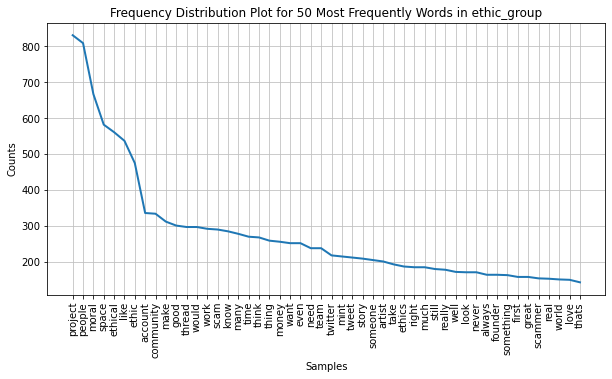

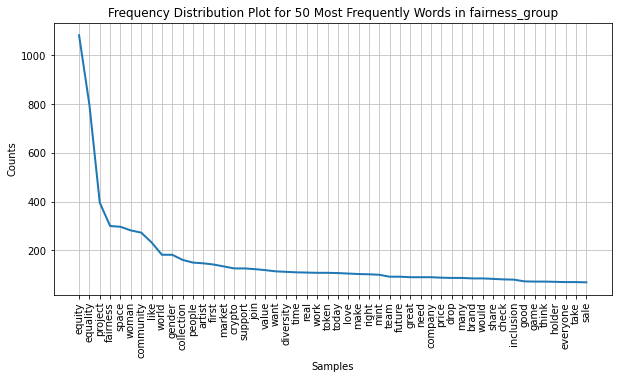

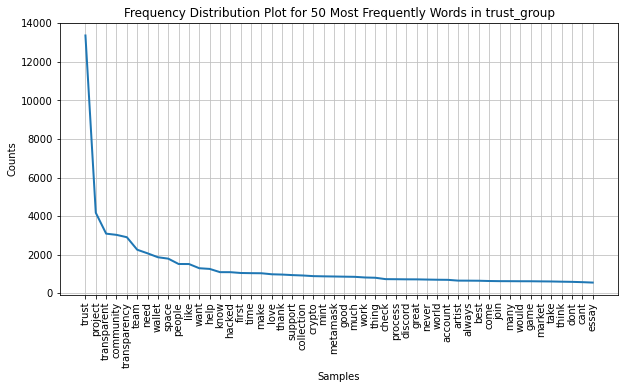

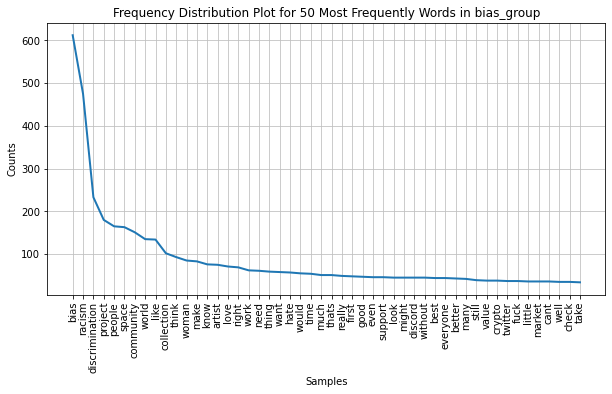

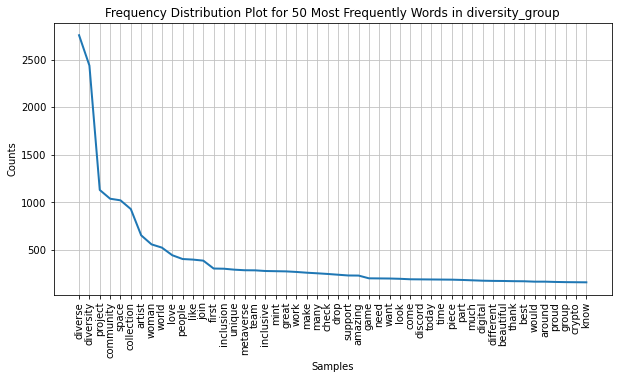

In [196]:
for i in ['ethic_group','fairness_group','trust_group','bias_group','diversity_group']:
    plt.figure(figsize=(10,5))
    plt.title(f'Frequency Distribution Plot for 50 Most Frequently Words in {i}')
    eval(i+'_fdist').plot(50)
    plt.show()

# Wordcloud

In [167]:
stop_words = stopwords.words('english')

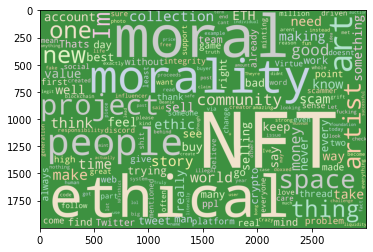

In [168]:
with open(f'tweets_ethic_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

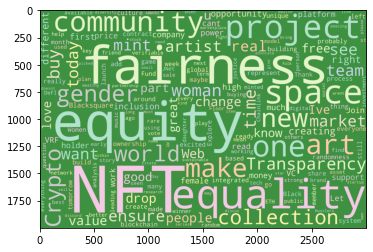

In [169]:
with open(f'tweets_fairness_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

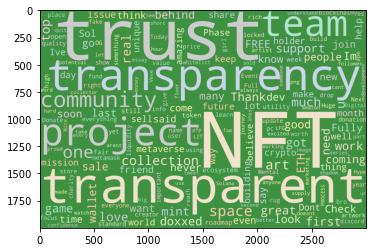

In [170]:
with open(f'tweets_trust_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

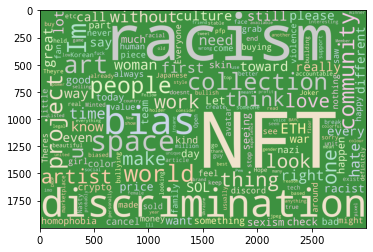

In [171]:
with open(f'tweets_bias_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

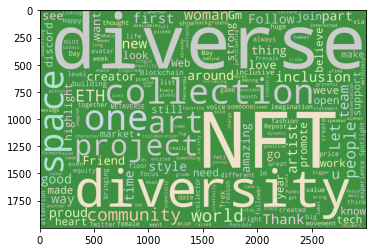

In [172]:
with open(f'tweets_diversity_group.txt',mode='r',encoding='utf-8') as f:
        wordcloud = WordCloud(random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).\
                generate(f.read())
        # Visualize the word cloud
        plt.imshow(wordcloud)

# Word Co-ocurrence and Network Analysis

## Analyze in total

In [311]:
from nltk import word_tokenize
from nltk.util import ngrams

# Define a function to calculate the bigram frequency of tweets by keyword group
def calculate_bigram(tweets):
    # 发现收集的每条推特的co-occurence words（即bigram 字母组）
    bigrams = []
    for tweet in tweets:
        token = word_tokenize(tweet)
        token = [i for i in token if len(i)>2]
        bigram = list(ngrams(token, 2)) 
        bigrams.extend(bigram)

    # 按照出现频率对bigram排序
    def sort_by_value(d):
        '''function used to sort dictionary by value'''
        return sorted(d.items(), key=lambda k: k[1],reverse=True)  # k[1] get the dict value

    # 计算bigram出现的频率        
    from collections import Counter
    bi_count = dict(Counter(bigrams))
    
    bi_freq = sort_by_value(bi_count)
    
    # transform dict to dataframe
    df = pd.DataFrame.from_dict(bi_count, orient='index')
    df = df.reset_index().rename(columns={'index': 'bigram'})
    # rename columns
    df.columns = ['bigram', 'count']
    
    return df

In [312]:
keywords = ethic_group+fairness_group+trust_group+bias_group+diversity_group

from nltk import word_tokenize
from nltk.util import ngrams

# 发现收集的每条推特的co-occurence words（即bigram 字母组）
bigrams = []
for tweet in tweets:
    token = word_tokenize(tweet)
    token = [i for i in token if len(i)>2]
    bigram = list(ngrams(token, 2)) 
    bigrams.extend(bigram)
    
# 按照出现频率对bigram排序
def sort_by_value(d):
    '''function used to sort dictionary by value'''
    return sorted(d.items(), key=lambda k: k[1],reverse=True)  # k[1] get the dict value

# 计算bigram出现的频率        
from collections import Counter
bi_count = dict(Counter(bigrams))

#bi_freq = sort_by_value(bi_count)

In [313]:
# transform dict to dataframe
df = pd.DataFrame.from_dict(bi_count, orient='index')
df = df.reset_index().rename(columns={'index': 'bigram'})
# rename columns
df.columns = ['bigram', 'count']
# Visualize top 30 bigrams
df.sort_values(by='count',ascending=False).iloc[:25]

,bigram,count
4409,"(rug, pull)",1873
848,"(nft, project)",1419
636,"(nft, space)",1360
54,"(trust, wallet)",1159
46523,"(ponzi, scheme)",670
206,"(trust, process)",514
2734,"(nft, community)",490
42,"(got, hacked)",415
4247,"(nft, collection)",377
270,"(metamask, trust)",356


In [139]:
import networkx as nx
# Create network plot
G = nx.Graph()
# Create connections between nodes
for row in df.iterrows():
    bigm = row[1][0]
    count = row[1][1]
    G.add_edge(bigm[0], bigm[1], weight=(count /100))
#G.remove_nodes_from(["one", "know","see","make"])
print('Graph now has',len(G.nodes()),'nodes')

Graph now has 29959 nodes


In [140]:
# biagrams => Top 20 central words
sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]

[('nft', 5222),
 ('trust', 4357),
 ('project', 2671),
 ('community', 1957),
 ('one', 1943),
 ('like', 1892),
 ('people', 1886),
 ('space', 1757),
 ('transparency', 1632),
 ('get', 1608),
 ('im', 1365),
 ('new', 1356),
 ('team', 1355),
 ('diversity', 1317),
 ('art', 1312),
 ('u', 1273),
 ('see', 1214),
 ('time', 1201),
 ('need', 1189),
 ('first', 1170)]

In [143]:
deg = G.degree()
to_keep = [item[0] for item in deg if item[1] >= 1000]
G_sub = G.subgraph(to_keep)
print('G_sub has',len(G_sub.nodes()),'nodes')

G_sub has 33 nodes


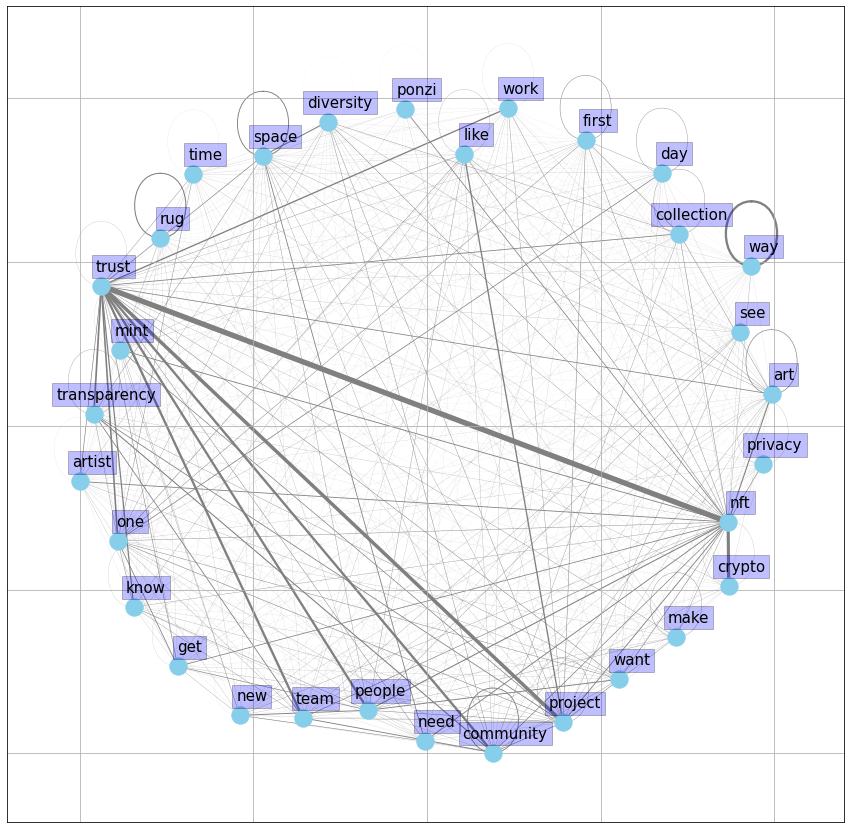

In [251]:
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G_sub, k=10) # spring layout
edgewidth = [d['weight']*2 for (u,v,d) in G_sub.edges(data=True)]

# Plot networks
nx.draw_networkx(G_sub, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='skyblue',
                 with_labels = False,
                 ax=ax)

plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.25), #text box color
            horizontalalignment='center', fontsize=15)
    
plt.show()

## Analyze by group

### bigrams

In [293]:
from nltk import word_tokenize
from nltk.util import ngrams

# 按关键词组的tweets返回推特文本的前n个共词组
def count_bigram_by_group(tweets,n):
    # 发现收集的每条推特的co-occurence words（即bigram 字母组）
    bigrams = []
    for tweet in tweets:
        token = word_tokenize(tweet)
        token = [i for i in token if len(i)>2]
        bigram = list(ngrams(token, 2)) 
        bigrams.extend(bigram)

    # 按照出现频率对bigram排序
    def sort_by_value(d):
        '''function used to sort dictionary by value'''
        return sorted(d.items(), key=lambda k: k[1],reverse=True)  # k[1] get the dict value

    # 计算bigram出现的频率        
    from collections import Counter
    bi_count = dict(Counter(bigrams))

    # transform dict to dataframe
    df = pd.DataFrame.from_dict(bi_count, orient='index')
    df = df.reset_index().rename(columns={'index': 'bigram'})
    # rename columns
    df.columns = ['bigram', 'count']
    # Visualize top 30 bigrams
    return df.sort_values(by='count',ascending=False).iloc[:n]

In [294]:
count_bigram_by_group(tweets_bias_group,20)

,bigram,count
501,"(nft, space)",79
28,"(nft, project)",54
12,"(nft, community)",46
683,"(nft, collection)",39
406,"(confirmation, bias)",33
11701,"(racism, nft)",25
1444,"(might, bias)",18
11487,"(racism, sexism)",17
11761,"(nft, racism)",17
9499,"(make, world)",17


In [295]:
count_bigram_by_group(tweets_fairness_group,20)

,bigram,count
8712,"(gender, equality)",130
341,"(nft, space)",129
109,"(nft, project)",117
5465,"(equity, nft)",48
2325,"(nft, community)",46
2147,"(nft, collection)",45
5194,"(home, equity)",38
8987,"(equality, nft)",36
4993,"(brand, equity)",34
5303,"(private, equity)",34


In [296]:
count_bigram_by_group(tweets_trust_group,20)

,bigram,count
54,"(trust, wallet)",1157
848,"(nft, project)",882
636,"(nft, space)",818
206,"(trust, process)",512
42,"(got, hacked)",411
270,"(metamask, trust)",356
73,"(sugar, daddy)",314
149,"(need, help)",313
2734,"(nft, community)",297
695,"(trust, nft)",275


In [297]:
count_bigram_by_group(tweets_ethic_group,20)

,bigram,count
204,"(nft, space)",210
83,"(nft, ethics)",123
51736,"(moral, story)",121
153,"(nft, ethic)",103
265,"(nft, project)",98
2661,"(nft, community)",50
260,"(moral, compass)",47
6908,"(twitter, account)",43
8369,"(red, flag)",40
2772,"(many, people)",38


In [298]:
count_bigram_by_group(tweets_diversity_group,20)

,bigram,count
849,"(nft, space)",425
314,"(nft, project)",274
72,"(diversity, inclusion)",199
1196,"(nft, collection)",174
10216,"(diverse, inclusive)",154
6149,"(diverse, metaverse)",151
848,"(diversity, nft)",139
1024,"(nft, community)",133
1807,"(diverse, community)",126
11247,"(diverse, nft)",117


### network analysis

In [203]:
df_bigram_bias = calculate_bigram(tweets_bias_group)
df_bigram_diverse = calculate_bigram(tweets_diversity_group)
df_bigram_ethic = calculate_bigram(tweets_ethic_group)
df_bigram_fair = calculate_bigram(tweets_fairness_group)
df_bigram_trust = calculate_bigram(tweets_trust_group)

In [252]:
def generate_nx_graph(df,name,line_weight,filter_number,*remove_wordlist):
    # Create network plot
    G = nx.Graph()
    # Create connections between nodes
    for row in df.iterrows():
        bigm = row[1][0]
        count = row[1][1]
        G.add_edge(bigm[0], bigm[1], weight=(count /100))
    if remove_wordlist!=None:
        G.remove_nodes_from(remove_wordlist)
    print(f'{name} now has',len(G.nodes()),'nodes')

    deg = G.degree()
    to_keep = [item[0] for item in deg if item[1] >= filter_number]
    G_sub = G.subgraph(to_keep)
    print('G_sub has',len(G_sub.nodes()),'nodes')

    fig, ax = plt.subplots(figsize=(10, 10))

    pos = nx.spring_layout(G_sub, k=10) # spring layout
    edgewidth = [d['weight']*line_weight for (u,v,d) in G_sub.edges(data=True)]

    # Plot networks
    nx.draw_networkx(G_sub, pos,
                     font_size=10,
                     width=edgewidth,
                     edge_color='grey',
                     node_color='skyblue',
                     with_labels = False,
                     ax=ax)

    plt.grid(None)
    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+0.035, value[1]+0.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='blue', alpha=0.25), #text box color
                horizontalalignment='center', fontsize=15)

    plt.show()

Bias group now has 5146 nodes
G_sub has 21 nodes


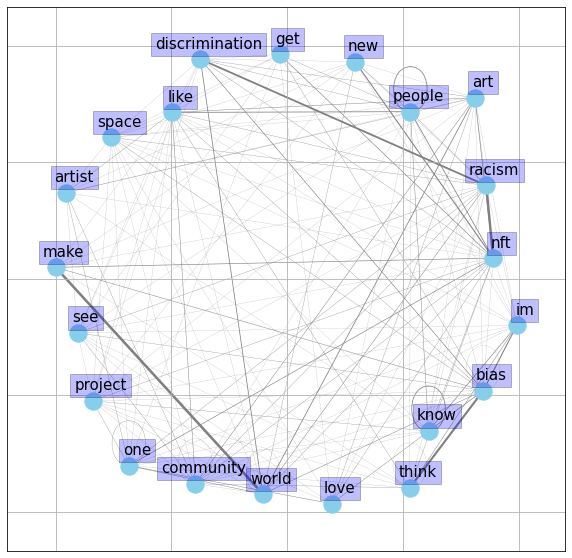

Diverse group now has 10463 nodes
G_sub has 22 nodes


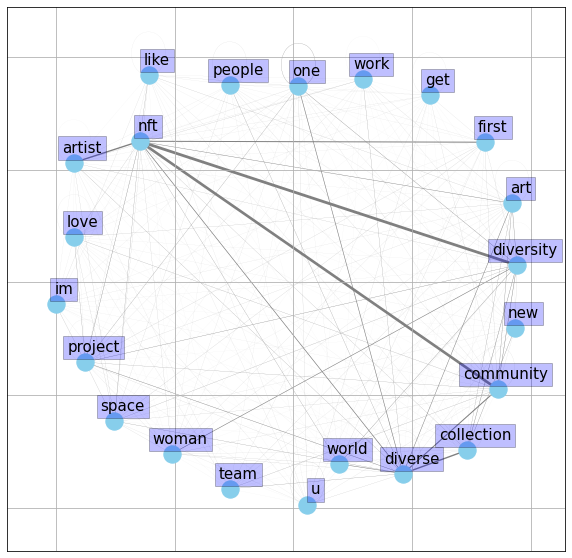

Ethic group now has 10520 nodes
G_sub has 32 nodes


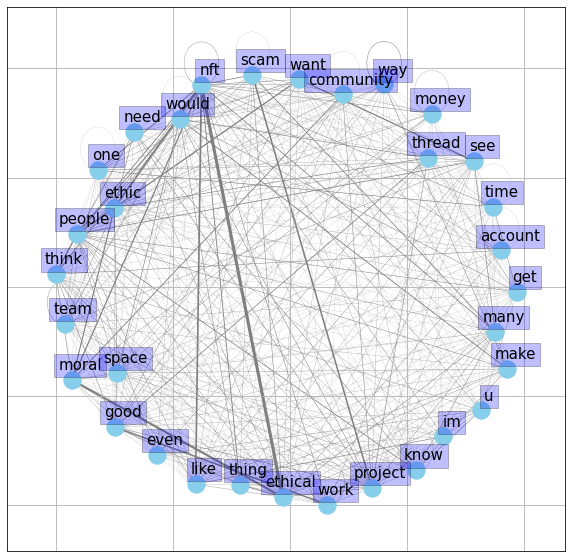

Fairiness group now has 7397 nodes
G_sub has 29 nodes


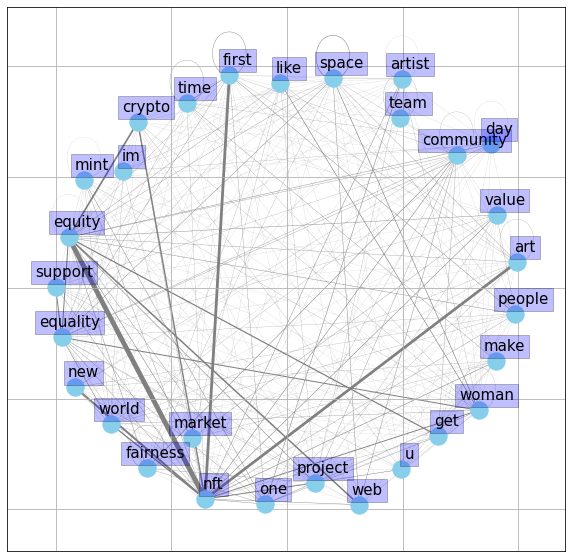

Trust group now has 21323 nodes
G_sub has 27 nodes


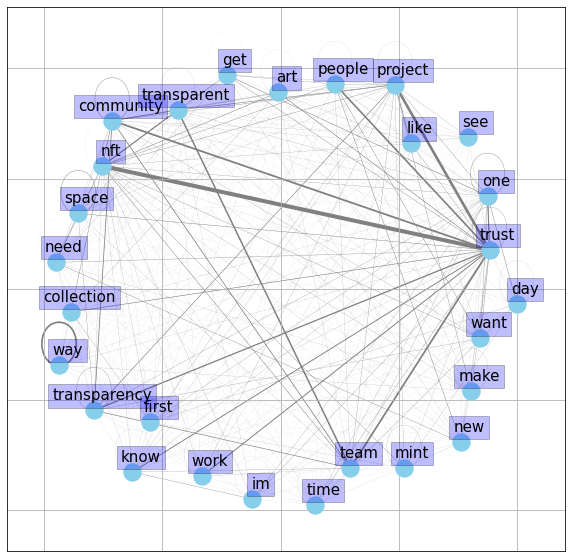

In [253]:
generate_nx_graph(df_bigram_bias,'Bias group',15,100,('get','im','see','u'))
generate_nx_graph(df_bigram_diverse,'Diverse group',2,300,('im','u'))
generate_nx_graph(df_bigram_ethic,'Ethic group',12,300,('im','u'))
generate_nx_graph(df_bigram_fair,'Fairiness group',10,150,('im','u'))
generate_nx_graph(df_bigram_trust,'Trust group',1.5,700,('u'))

# Sentiment Analysis

**Vader**, method developed specifically for Twitter and social media analysis(Hutto CJ, Gilbert E (2014) Vader: a parsimonious rule-based model for sentiment analysis of social media text. In: Eighth international AAAI conference on weblogs and social media. AAAI Press, Menlo Park).   
In real social platforms or daily conversations, some comments or words can be negative or positive based on the context. VADER works well given enough sentences. However, if the input is quite short, VADER sometimes can't tell the real sentiment behind short sentences.

In [145]:
vader = pd.read_csv('./vader_lexicon.txt',sep='\t',
            header=None,names=['TOKEN', 'MEAN-SENTIMENT-RATING', 'STANDARD DEVIATION', 'RAW-HUMAN-SENTIMENT-RATINGS'])

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [150]:
def tweet_sent_analysis(df):
    vader_score = {}
    avg_vs = 0
    for tweet in df['Tweets']:  
        if tweet != '':
            # return a dict consists of neg,neu,pos,compound scores
            vs = analyzer.polarity_scores(tweet) 
            # extract the compound score we only need it
            avg_vs+=vs['compound']
            vader_score[tweet] = avg_vs/len(df['Tweets'])
    
    return vader_score,avg_vs

**keyword-based**

In [151]:
df = pd.DataFrame([])
for i in :
    if ' ' in i:
        i = i.replace(" ","_")
    name = f'df_{i}'
    df = eval('pd.concat([{},df])'.format(name))

print(df.shape[0],'tweets are crawled')

31943 tweets are crawled


In [152]:
vader_score,avg_vs = tweet_sent_analysis(df)

In [153]:
''' 
positive sentiment: compound score >= 0.05   
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)   
negative sentiment: compound score <= -0.05   
'''
df_tweet_vader_score = pd.DataFrame(vader_score.items(),columns=['tweet','compound'])

pos_count = (df_tweet_vader_score['compound']>=0.05).sum()
neu_count = ((df_tweet_vader_score['compound']>-0.05) & (df_tweet_vader_score['compound']<0.05)).sum()
neg_count = (df_tweet_vader_score['compound']<=-0.05).sum()

dict_sentiment_type_count = {'positive':pos_count,'neutral':neu_count,'negative':neg_count}

Text(0.5, 0, 'sentiment')

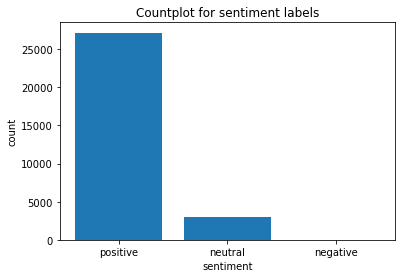

In [154]:
plt.bar(dict_sentiment_type_count.keys(),dict_sentiment_type_count.values())
plt.title('Countplot for sentiment labels')
plt.ylabel('count')
plt.xlabel('sentiment')

In [259]:
def plot_sentiment(tweet_lst,name):
    vader_score = {}
    avg_vs = 0
    for tweet in tweet_lst:  
        if tweet != '':
            # return a dict consists of neg,neu,pos,compound scores
            vs = analyzer.polarity_scores(tweet) 
            # extract the compound score we only need it
            avg_vs+=vs['compound']
            vader_score[tweet] = avg_vs/len(tweet_lst)
            
    df_tweet_vader_score = pd.DataFrame(vader_score.items(),columns=['tweet','compound'])

    pos_count = (df_tweet_vader_score['compound']>=0.05).sum()
    neu_count = ((df_tweet_vader_score['compound']>-0.05) & (df_tweet_vader_score['compound']<0.05)).sum()
    neg_count = (df_tweet_vader_score['compound']<=-0.05).sum()

    dict_sentiment_type_count = {'positive':pos_count,'neutral':neu_count,'negative':neg_count}
    
    plt.bar(dict_sentiment_type_count.keys(),dict_sentiment_type_count.values())
    plt.title(f'Countplot for sentiment labels of {name}')
    plt.ylabel('count')
    plt.xlabel('sentiment')
    plt.show()

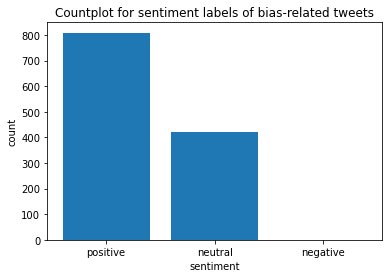

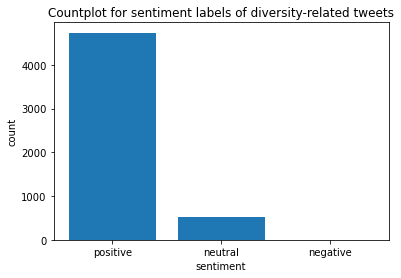

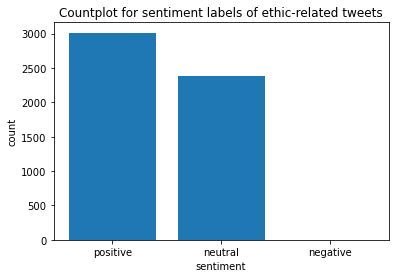

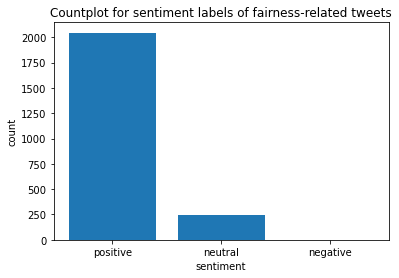

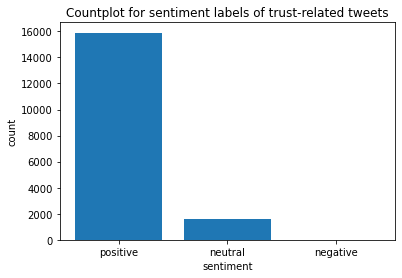

In [260]:
plot_sentiment(tweets_bias_group,'bias-related tweets')
plot_sentiment(tweets_diversity_group,'diversity-related tweets')
plot_sentiment(tweets_ethic_group,'ethic-related tweets')
plot_sentiment(tweets_fairness_group,'fairness-related tweets')
plot_sentiment(tweets_trust_group,'trust-related tweets')

# Topic Modeling
References: 
1. https://medium.datadriveninvestor.com/trump-tweets-topic-modeling-using-latent-dirichlet-allocation-e4f93b90b6fe
2. https://www.kaggle.com/code/errearanhas/topic-modelling-lda-on-elon-tweets/notebook
3. https://ourcodingclub.github.io/tutorials/topic-modelling-python/

In [133]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(
    analyzer='word',       
    min_df=5,# minimum required occurences of a word 
    stop_words='english',# remove stop words
    lowercase=True,# convert all words to lowercase
    token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
    max_features=5000,# max number of unique words
)

## [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

LDA on sampled tweets word list

In [134]:
# apply transformation
data_matrix = vectorizer.fit_transform(words_sampled).toarray() # the frequency of each word/token in each tweet
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5
lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
lda.fit(data_matrix) # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

LatentDirichletAllocation(n_components=5, random_state=0)

In [135]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [136]:
no_top_words = 5 # dataframe row display numbers
display_topics(lda, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,community,89.2,project,105.2,collection,66.2,like,70.2,transparency,62.2
1,moral,53.2,space,92.2,trust,60.2,people,70.2,discrimination,56.2
2,ethical,50.2,racism,58.2,artist,47.2,team,59.2,world,55.2
3,diversity,49.2,transparent,53.2,make,43.2,good,40.2,bias,53.2
4,fairness,42.2,crypto,29.2,thing,40.2,think,34.2,diverse,52.2


## Evaluate topic coherence score to tune the model
1. https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
2. https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

In [181]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(sampled_words_group.values())
# Create Corpus
texts = sampled_words_group.values()
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

Base Model

In [ ]:
id2word

In [ ]:
import gensim
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=200, # controls how many documents are processed at a time in the training algorithm.
                                       passes=10, # controls how often we train the model on the entire corpus,'epochs' or 'iterations'
                                       per_word_topics=True)

View the topics in LDA model

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=sampled_words_group.values(), dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

## Topic Visualization

In [137]:
#!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

dtm = np.matrix(data_matrix) # Casting the document vectors to a numpy.matrix
pyLDAvis.sklearn.prepare(lda, dtm, vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  20.986124
4       51.163364 -159.968018       2        1  20.707399
0      -73.144554   21.523815       3        1  20.428654
1      -66.410133 -110.606438       4        1  19.448318
3       54.417324   12.443444       5        1  18.429505, topic_info=          Term        Freq       Total Category  logprob  loglift
286    project  100.000000  100.000000  Default  30.0000  30.0000
339      space   88.000000   88.000000  Default  29.0000  29.0000
61   community   81.000000   81.000000  Default  28.0000  28.0000
204       like   70.000000   70.000000  Default  27.0000  27.0000
258     people   70.000000   70.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
349       stop    9.172112    9.901068   Topic5  -4.6494   1.6147
148       girl    9.172112    9.901068   Topic5  -4.6494   1.6147
269       play    8.175130    8.904087   Topic5  -4.7645   1.6058
122     family    8.175130    8.904087   Topic5  -4.7645   1.6058
118       fact    8.175130    8.904087   Topic5  -4.7645   1.6058

[180 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         3  0.929723    account
6         3  0.934492    amazing
12        1  0.983026     artist
16        3  0.929723  available
21        3  0.941909      based
...     ...       ...        ...
415       5  0.917595       word
416       1  0.967128       work
417       4  0.975617    working
418       2  0.992898      world
421       3  0.977130       year

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

### By group

In [143]:
def draw_topic_modeling(number_of_topics,words):
    # apply transformation
    tf = vectorizer.fit_transform(words).toarray()  # the frequency of each word/token in each tweet
    # tf_feature_names tells us what word each column in the matric represents
    tf_feature_names = vectorizer.get_feature_names()
    
    data_matrix = vectorizer.fit_transform(words).toarray()

    from sklearn.decomposition import LatentDirichletAllocation

    number_of_topics = number_of_topics
    lda = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
    lda.fit(data_matrix) # create a double wrapper over the original corpus: sbow->tfidf->fold-in-lsi
    
    import pyLDAvis
    import pyLDAvis.sklearn
    pyLDAvis.enable_notebook()

    dtm = np.matrix(data_matrix) # Casting the document vectors to a numpy.matrix
    return pyLDAvis.sklearn.prepare(lda, dtm, vectorizer, mds='tsne')

In [144]:
draw_topic_modeling(5,sampled_words_group['trust_group'])

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  24.639806
1       51.163364 -159.968018       2        1  19.839973
2      -73.144554   21.523815       3        1  19.440018
3      -66.410133 -110.606438       4        1  18.960061
0       54.417324   12.443444       5        1  17.120142, topic_info=            Term       Freq      Total Category  logprob  loglift
52   transparent  49.000000  49.000000  Default  30.0000  30.0000
51  transparency  46.000000  46.000000  Default  29.0000  29.0000
53         trust  46.000000  46.000000  Default  28.0000  28.0000
45          team  34.000000  34.000000  Default  27.0000  27.0000
7      community  32.000000  32.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
44       support   0.211951   8.039351   Topic5  -6.2242  -1.8708
28          mint   0.211951   8.039351   Topic5  -6.2242  -1.8708
23          like   0.211951  10.408592   Topic5  -6.2242  -2.1291
35       project   0.211950  30.152271   Topic5  -6.2242  -3.1928
53         trust   0.211949  46.736962   Topic5  -6.2242  -3.6310

[213 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         2  0.905110       amazing
1         2  0.905110       believe
2         5  0.963306      building
3         2  0.950928         check
4         3  0.891874    collection
5         2  0.931286          come
6         1  0.827631        coming
7         3  0.978339     community
8         1  0.819611        crypto
9         2  0.905110          dont
10        5  0.955463        doxxed
11        2  0.905110     ecosystem
12        1  0.819611          fair
13        4  0.918505          free
14        5  0.958389         fully
15        3  0.892115        future
16        5  0.955463          game
17        5  0.956761          good
18        2  0.869729         great
19        2  0.905110          help
20        5  0.960490         issue
21        2  0.931286          join
22        3  0.936594          know
23        1  0.960745          like
24        3  0.936594          look
25        3  0.972977          love
26        1  0.819611          make
27        4  0.875688     metaverse
28        1  0.870717          mint
29        2  0.905110       mission
30        1  0.819611         month
31        1  0.827631          need
32        1  0.819611          open
33        3  0.936594        people
34        3  0.892115         phase
35        1  0.961785       project
36        4  0.953470          real
37        2  0.905110       roadmap
38        1  0.881817          said
39        3  0.951418          sale
40        1  0.819611          sell
41        3  0.892115         share
42        4  0.918505          soon
43        3  0.927499         space
44        1  0.870717       support
45        5  0.976107          team
46        3  0.892115        thanks
47        4  0.875688         thing
48        5  0.960490         think
49        1  0.881817          time
50        2  0.905110         token
51        2  0.981698  transparency
52        4  0.986524   transparent
53        1  0.984232         trust
54        2  0.905110        unique
55        4  0.875688       utility
56        4  0.932757        wallet
57        5  0.958389          want
58        4  0.944152          work
59        4  0.875688         world, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])